# Reverse MNIST

## Preliminaries

In [874]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import torch
dtype = torch.float
device = torch.device("cpu")
device = torch.device("cuda:0") # Uncomment this to run on GPU
import NeuralNetwork as NN
import Layer
import importlib
import time
from copy import deepcopy
from IPython.display import display
from ipywidgets import FloatProgress

import mnist_loader
importlib.reload(mnist_loader)
importlib.reload(NN)
importlib.reload(Layer);

## Load MNIST DATA

In [875]:
train, validate, test = mnist_loader.load_data_wrapper()
train = [torch.tensor(train[0]).float().to(device), torch.tensor(train[1]).float().to(device)]

In [867]:
howmany = 100 #1000 #50
train, validate, test = mnist_loader.load_data_wrapper()
train = [torch.tensor(train[0][:howmany]).float().to(device), torch.tensor(train[1][:howmany]).float().to(device)]

## Create Network

In [465]:
# Shallow Reversed
net = NN.NeuralNetwork()
net.AddLayer(Layer.InputPELayer(n=10))  # 0 Class vector
net.AddLayer(Layer.TopPELayer(n=784))  # 1 Input
net.Connect(0,1)
# Input layer is one-hot
net.layers[0].SetActivationFunction('softmax')
# Top vector reconstructed image, [0, 1]
net.layers[-1].SetActivationFunction('logistic')

net.SetTau(0.04)

In [876]:
# Deep Reversed
net = NN.NeuralNetwork()
net.AddLayer(Layer.InputPELayer(n=10))  # 0 Target Class vector
net.AddLayer(Layer.PELayer(n=100))  # 1 Hidden
net.AddLayer(Layer.PELayer(n=200))  # 2 Hidden
net.AddLayer(Layer.TopPELayer(n=784))  # 3 Image
net.Connect(0,1)
net.Connect(1,2)
net.Connect(2,3)
# Input layer is one-hot
net.layers[1].SetActivationFunction('logistic')
net.layers[2].SetActivationFunction('logistic')
# Top vector reconstructed image, [0, 1]
net.layers[-1].SetActivationFunction('logistic')

net.SetTau(0.08)

In [877]:
net.learning_blackout = 1.

In [824]:
net.layers[0].Probe(True)
net.layers[1].Probe(True)

## Train the Network

In [ ]:
# Train in reverse direction: one-hot -> reconstructed image
epochs = 30
T = 2.
dt = 0.01
start_time = time.time()
batch_size = 10
net.learning_tau = 30. #torch.tensor(batch_size).float().to(device) * 10.
fp = FloatProgress(min=0,max=epochs*len(train[0]))  
display(fp)
for k in range(epochs):
    batches = NN.MakeBatches(train[0], train[1], batch_size=batch_size)
    for x in batches:
        #net.Reset()
        net.BackprojectExpectation(x[0])
        net.Infer(T, x[1], x[0], dt=dt, learning=True)
        fp.value += batch_size
end_time = time.time()
print('Total time: '+str(end_time-start_time))

Allocating


## Probe the Model

In [ ]:
p = 25 #147 or 35   for 2s
#p = 133 #133 or 141   for 7s
plt.imshow(np.reshape(train[0][p],[28,28]), cmap='gray'); plt.axis('off');
net.BackprojectExpectation(train[0][p])
#net.Reset()
zFF = net.layers[1].sigma(net.layers[1].v)@net.connections[0].M + net.layers[0].b
z = net.Generate(10., train[0][p])
print(z)
print(zFF)

tensor([-0.1561, -0.1473,  0.8419,  0.2897, -0.0210,  0.1336,  0.1626,
        -0.1913,  0.0985,  0.2048], device='cuda:0')
tensor([-0.1561, -0.1473,  0.8419,  0.2897, -0.0210,  0.1336,  0.1626,
        -0.1913,  0.0985,  0.2048], device='cuda:0')


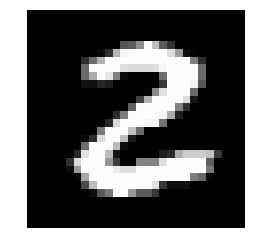

In [872]:
p = 25 #147 or 35   for 2s
#p = 133 #133 or 141   for 7s
plt.imshow(np.reshape(train[0][p],[28,28]), cmap='gray'); plt.axis('off');
net.BackprojectExpectation(train[0][p])
#net.Reset()
zFF = net.layers[1].sigma(net.layers[1].v)@net.connections[0].M + net.layers[0].b
z = net.Generate(10., train[0][p])
print(zFF)
print(z)

In [862]:
net.layers[2].e

tensor([-0.6630, -0.4060, -0.5370, -0.5946,  0.0235, -0.4419, -0.4136,
        -0.5363, -0.2361, -0.6288, -0.6636,  0.0182, -0.2524, -0.6443,
         0.0666, -0.2432, -0.5192, -0.2630,  0.0672, -0.4299, -0.2799,
        -0.3270, -0.4722, -0.2915, -0.2387, -0.6291, -0.4306, -0.4043,
        -0.3108, -0.4044,  0.0059, -0.0420, -0.5448, -0.1940, -0.3693,
         0.0538, -0.6437, -0.6108, -0.3526, -0.2897, -0.1768, -0.4954,
        -0.5651, -0.4772, -0.3429, -0.3982, -0.4376, -0.2767, -0.5439,
        -0.2789, -0.2896, -0.5782, -0.4211,  0.5025, -0.4568, -0.3414,
        -0.3493, -0.5761, -0.4144, -0.3069, -0.2567, -0.2938, -0.2123,
        -0.5389, -0.0210, -0.2585, -0.5011, -0.5533, -0.4537, -0.3058,
        -0.6648, -0.4470, -0.3103, -0.6925, -0.6746, -0.4639, -0.3840,
        -0.1271, -0.6781, -0.5621,  0.2860, -0.5067, -0.4853, -0.5447,
        -0.5544, -0.4816, -0.3287, -0.4896, -0.4471, -0.2367, -0.3825,
        -0.2594,  0.0901, -0.3444, -0.3314, -0.3516, -0.4054, -0.2016,
      

In [857]:
net.layers[2].beta

1.0

In [695]:
z = net.Predict(10., train[1][0], dt=0.01)

Allocating


In [572]:
plt.plot(net.t_history, np.array(net.layers[1].v_history)[:,200:300]);

IndexError: too many indices for array

## Save the Model

In [457]:
net.Save('MNIST reversed deep.npy')

## Load the Model

In [458]:
net = NN.NeuralNetwork()
net.Load('MNIST reversed.npy')

## Test the Network

In [574]:
net.Infer(4., test[1][p], test[0][p], dt=0.1, learning=True)
net.learn

True

In [801]:
net.layers[0].b

tensor([-0.0499,  0.0558,  0.0397,  0.1287,  0.0520, -0.0407,  0.0415,
        -0.0640,  0.0218,  0.0696], device='cuda:0')

In [802]:
net.SetTau(0.08)
net.layers[1].Probe(True)
net.layers[2].Probe(True)
#net.BackprojectExpectation(test[0][0])
#net.Reset()
net.Generate(4., test[0][0])
print(net.layers[0].v)
print(net.layers[1].v[:8])

Allocating
tensor([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.], device='cuda:0')
tensor([ 0.3598,  1.9552, -1.3044,  0.0423, -0.4499,  2.0527, -0.8055,
         1.0942], device='cuda:0')


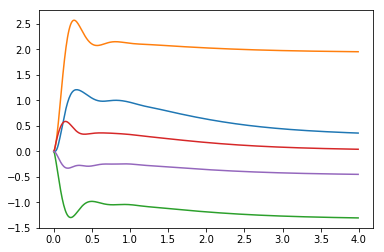

In [803]:
plt.plot(net.t_history, np.array(net.layers[1].v_history)[:,:5]);

In [804]:
net.Generate(4., test[0][1])
#net.BackprojectExpectation(test[0][1])
print(net.layers[0].v)
print(net.layers[1].v[:8])

tensor([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.], device='cuda:0')
tensor([ 0.8965,  2.0493, -1.0175,  0.3032, -0.1225,  1.9652, -1.0904,
         0.3211], device='cuda:0')


tensor([ 0.0336,  0.2226,  0.1024,  0.1838, -0.0186,  0.0559,  0.1848,
        -0.0162,  0.1074,  0.1753], device='cuda:0')


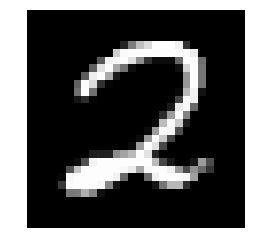

In [805]:
p = 35 #147 or 35   for 2s
#p = 133 #133 or 141   for 7s
plt.imshow(np.reshape(test[0][p],[28,28]), cmap='gray'); plt.axis('off');
net.BackprojectExpectation(test[0][p])
#net.Reset()
z = net.Generate(4., test[0][p])
print(z)

tensor([ 0.4397,  0.0024, -0.0015, -0.0045,  0.5378,  0.0048, -0.0211,
        -0.0002,  0.0450,  0.0091], device='cuda:0')


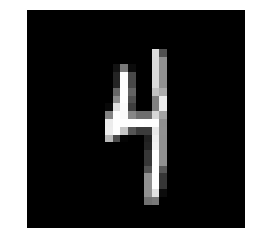

In [806]:
p = 65 #147 or 35   for 2s
#p = 141 #133 or 141   for 7s
plt.imshow(np.reshape(test[0][p],[28,28]), cmap='gray'); plt.axis('off');
#net.BackprojectExpectation(test[0][p])
net.Reset()
net.SetTau(0.08)
z = net.Generate(4., test[0][p])
print(z)

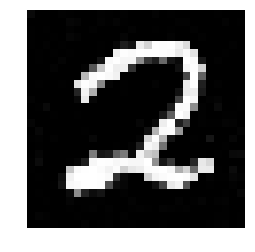

In [769]:
#net.Reset()
z = net.layers[-1].sigma(net.Predict(4., test[1][p]))
plt.imshow(np.reshape(z,[28, 28]), cmap='gray'); plt.axis('off');

In [747]:
net.connections[-1].W

tensor([[-7.8700e+00, -7.5592e+00, -7.9245e+00,  ..., -7.8728e+00,
         -7.8759e+00, -7.5584e+00],
        [-7.6409e+01, -7.6099e+01, -7.6255e+01,  ..., -7.6007e+01,
         -7.6306e+01, -7.6060e+01],
        [-3.6636e+01, -3.6518e+01, -3.6407e+01,  ..., -3.6282e+01,
         -3.6350e+01, -3.6430e+01],
        ...,
        [-5.9620e+01, -5.9497e+01, -5.9523e+01,  ..., -5.9550e+01,
         -5.9734e+01, -5.9477e+01],
        [ 5.7501e+01,  5.7906e+01,  5.8006e+01,  ...,  5.8055e+01,
          5.7666e+01,  5.7868e+01],
        [ 1.8698e+01,  1.8819e+01,  1.8858e+01,  ...,  1.8783e+01,
          1.8691e+01,  1.8908e+01]], device='cuda:0')

In [547]:
net.Reset()
net.SetTau(0.08)  # it seems like choosing a value half of that during training works best
yy = net.Generate(8., test[0])
y_true = test[1]
y = np.array([np.array(Layer.softmax(k)) for k in yy])

In [540]:
sum(y[0])

tensor(0.9954, device='cuda:0')

In [548]:
z = np.array(deepcopy(y))
for idx, blah in enumerate(y):
    z[idx,:] = NN.OneHot(blah)

In [549]:
err = np.sum(np.abs(z-test[1]))/2.
print(err)
print('Accuracy = '+str((len(z)-err)/len(z)*100.)+'%')

8990.0
Accuracy = 10.100000000000001%
